In [3]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [4]:
actions = [
    'Question',
    'Can''t listen',
    'Cant''t watch'
]

data = np.concatenate([
    np.load('dataset/seq_question_1658689312.npy'),
    np.load('dataset/seq_cant listen_1658689312.npy'),
    np.load('dataset/seq_cant watch_1658689312.npy')
], axis=0)

data.shape

(2019, 30, 100)

In [5]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(2019, 30, 99)
(2019,)


In [6]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(2019, 3)

In [7]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1817, 30, 99) (1817, 3)
(202, 30, 99) (202, 3)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                41984     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 44,163
Trainable params: 44,163
Non-trainable params: 0
_________________________________________________________________


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
57/57 [==============================] - ETA: 0s - loss: 3.0719 - acc: 0.8343
Epoch 1: val_acc improved from -inf to 0.96535, saving model to models\model.h5
57/57 [==============================] - 3s 25ms/step - loss: 3.0719 - acc: 0.8343 - val_loss: 0.1610 - val_acc: 0.9653 - lr: 0.0010
Epoch 2/200
54/57 [===========================>..] - ETA: 0s - loss: 0.4082 - acc: 0.9780
Epoch 2: val_acc did not improve from 0.96535
57/57 [==============================] - 1s 16ms/step - loss: 0.4089 - acc: 0.9747 - val_loss: 0.8396 - val_acc: 0.9208 - lr: 0.0010
Epoch 3/200
57/57 [==============================] - ETA: 0s - loss: 0.3102 - acc: 0.9681
Epoch 3: val_acc did not improve from 0.96535
57/57 [==============================] - 1s 16ms/step - loss: 0.3102 - acc: 0.9681 - val_loss: 0.3619 - val_acc: 0.9554 - lr: 0.0010
Epoch 4/200
56/57 [============================>.] - ETA: 0s - loss: 5.1881 - acc: 0.8253
Epoch 4: val_acc did not improve from 0.96535
57/57 [================

Epoch 30/200
57/57 [==============================] - ETA: 0s - loss: 2.1204e-04 - acc: 1.0000
Epoch 30: val_acc did not improve from 1.00000
57/57 [==============================] - 1s 16ms/step - loss: 2.1204e-04 - acc: 1.0000 - val_loss: 4.7617e-04 - val_acc: 1.0000 - lr: 0.0010
Epoch 31/200
54/57 [===========================>..] - ETA: 0s - loss: 2.0958e-04 - acc: 1.0000
Epoch 31: val_acc did not improve from 1.00000
57/57 [==============================] - 1s 17ms/step - loss: 1.9953e-04 - acc: 1.0000 - val_loss: 4.5384e-04 - val_acc: 1.0000 - lr: 0.0010
Epoch 32/200
56/57 [============================>.] - ETA: 0s - loss: 1.8685e-04 - acc: 1.0000
Epoch 32: val_acc did not improve from 1.00000
57/57 [==============================] - 1s 17ms/step - loss: 1.8889e-04 - acc: 1.0000 - val_loss: 4.3539e-04 - val_acc: 1.0000 - lr: 0.0010
Epoch 33/200
56/57 [============================>.] - ETA: 0s - loss: 1.8018e-04 - acc: 1.0000
Epoch 33: val_acc did not improve from 1.00000
57/57 [==

Epoch 59/200
57/57 [==============================] - ETA: 0s - loss: 5.6965e-05 - acc: 1.0000
Epoch 59: val_acc did not improve from 1.00000
57/57 [==============================] - 1s 18ms/step - loss: 5.6965e-05 - acc: 1.0000 - val_loss: 1.2001e-04 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 60/200
57/57 [==============================] - ETA: 0s - loss: 5.5827e-05 - acc: 1.0000
Epoch 60: val_acc did not improve from 1.00000
57/57 [==============================] - 1s 18ms/step - loss: 5.5827e-05 - acc: 1.0000 - val_loss: 1.1735e-04 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 61/200
55/57 [===========================>..] - ETA: 0s - loss: 5.3192e-05 - acc: 1.0000
Epoch 61: val_acc did not improve from 1.00000
57/57 [==============================] - 1s 18ms/step - loss: 5.4732e-05 - acc: 1.0000 - val_loss: 1.1421e-04 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 62/200
54/57 [===========================>..] - ETA: 0s - loss: 5.5991e-05 - acc: 1.0000
Epoch 62: val_acc did not improve from 1.000

Epoch 88/200
57/57 [==============================] - ETA: 0s - loss: 2.7216e-05 - acc: 1.0000
Epoch 88: val_acc did not improve from 1.00000
57/57 [==============================] - 1s 15ms/step - loss: 2.7216e-05 - acc: 1.0000 - val_loss: 5.1712e-05 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 89/200
57/57 [==============================] - ETA: 0s - loss: 2.6453e-05 - acc: 1.0000
Epoch 89: val_acc did not improve from 1.00000
57/57 [==============================] - 1s 15ms/step - loss: 2.6453e-05 - acc: 1.0000 - val_loss: 4.9715e-05 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 90/200
57/57 [==============================] - ETA: 0s - loss: 2.5692e-05 - acc: 1.0000
Epoch 90: val_acc did not improve from 1.00000
57/57 [==============================] - 1s 15ms/step - loss: 2.5692e-05 - acc: 1.0000 - val_loss: 4.8040e-05 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 91/200
57/57 [==============================] - ETA: 0s - loss: 2.5006e-05 - acc: 1.0000
Epoch 91: val_acc did not improve from 1.000

57/57 [==============================] - ETA: 0s - loss: 1.3000e-05 - acc: 1.0000
Epoch 116: val_acc did not improve from 1.00000
57/57 [==============================] - 1s 16ms/step - loss: 1.3000e-05 - acc: 1.0000 - val_loss: 2.8096e-05 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 117/200
57/57 [==============================] - ETA: 0s - loss: 1.2780e-05 - acc: 1.0000
Epoch 117: val_acc did not improve from 1.00000
57/57 [==============================] - 1s 15ms/step - loss: 1.2780e-05 - acc: 1.0000 - val_loss: 2.7684e-05 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 118/200
57/57 [==============================] - ETA: 0s - loss: 1.2529e-05 - acc: 1.0000
Epoch 118: val_acc did not improve from 1.00000
57/57 [==============================] - 1s 15ms/step - loss: 1.2529e-05 - acc: 1.0000 - val_loss: 2.7444e-05 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 119/200
57/57 [==============================] - ETA: 0s - loss: 1.2271e-05 - acc: 1.0000
Epoch 119: val_acc did not improve from 1.00000
57/

57/57 [==============================] - 1s 15ms/step - loss: 6.6707e-06 - acc: 1.0000 - val_loss: 1.6107e-05 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 145/200
57/57 [==============================] - ETA: 0s - loss: 6.4964e-06 - acc: 1.0000
Epoch 145: val_acc did not improve from 1.00000
57/57 [==============================] - 1s 15ms/step - loss: 6.4964e-06 - acc: 1.0000 - val_loss: 1.5714e-05 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 146/200
57/57 [==============================] - ETA: 0s - loss: 6.2993e-06 - acc: 1.0000
Epoch 146: val_acc did not improve from 1.00000
57/57 [==============================] - 1s 15ms/step - loss: 6.2993e-06 - acc: 1.0000 - val_loss: 1.5348e-05 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 147/200
57/57 [==============================] - ETA: 0s - loss: 6.1243e-06 - acc: 1.0000
Epoch 147: val_acc did not improve from 1.00000
57/57 [==============================] - 1s 15ms/step - loss: 6.1243e-06 - acc: 1.0000 - val_loss: 1.5017e-05 - val_acc: 1.0000 - lr:

Epoch 173/200
57/57 [==============================] - ETA: 0s - loss: 3.3605e-06 - acc: 1.0000
Epoch 173: val_acc did not improve from 1.00000
57/57 [==============================] - 1s 15ms/step - loss: 3.3605e-06 - acc: 1.0000 - val_loss: 1.0251e-05 - val_acc: 1.0000 - lr: 1.2500e-04
Epoch 174/200
54/57 [===========================>..] - ETA: 0s - loss: 3.4613e-06 - acc: 1.0000
Epoch 174: val_acc did not improve from 1.00000
57/57 [==============================] - 1s 16ms/step - loss: 3.2957e-06 - acc: 1.0000 - val_loss: 1.0171e-05 - val_acc: 1.0000 - lr: 1.2500e-04
Epoch 175/200
57/57 [==============================] - ETA: 0s - loss: 3.2339e-06 - acc: 1.0000
Epoch 175: val_acc did not improve from 1.00000
57/57 [==============================] - 1s 15ms/step - loss: 3.2339e-06 - acc: 1.0000 - val_loss: 1.0048e-05 - val_acc: 1.0000 - lr: 1.2500e-04
Epoch 176/200
57/57 [==============================] - ETA: 0s - loss: 3.1690e-06 - acc: 1.0000
Epoch 176: val_acc did not improve fr

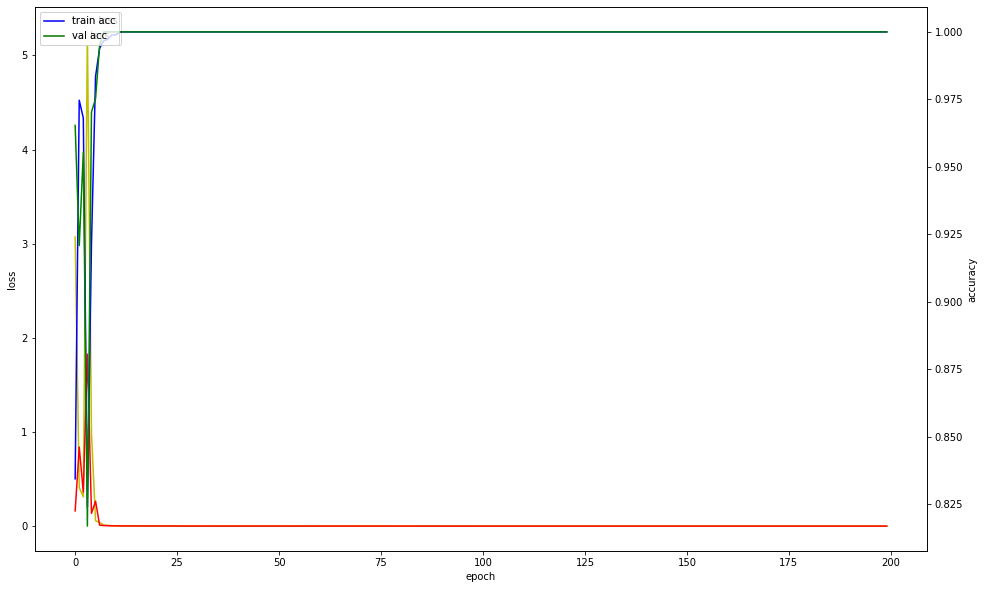

In [10]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [11]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

7/7 [==============================] - 0s 7ms/step


array([[[145,   0],
        [  0,  57]],

       [[129,   0],
        [  0,  73]],

       [[130,   0],
        [  0,  72]]], dtype=int64)